In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model, Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input, Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
df1 = pd.read_json("Indian_Number_plates.json", lines=True)
print(df1)
df1.head()

                                               content  \
0    http://com.dataturks.a96-i23.open.s3.amazonaws...   
1    http://com.dataturks.a96-i23.open.s3.amazonaws...   
2    http://com.dataturks.a96-i23.open.s3.amazonaws...   
3    http://com.dataturks.a96-i23.open.s3.amazonaws...   
4    http://com.dataturks.a96-i23.open.s3.amazonaws...   
..                                                 ...   
232  http://com.dataturks.a96-i23.open.s3.amazonaws...   
233  http://com.dataturks.a96-i23.open.s3.amazonaws...   
234  http://com.dataturks.a96-i23.open.s3.amazonaws...   
235  http://com.dataturks.a96-i23.open.s3.amazonaws...   
236  http://com.dataturks.a96-i23.open.s3.amazonaws...   

                                            annotation  extras  
0    [{'label': ['number_plate'], 'notes': '', 'poi...     NaN  
1    [{'label': ['number_plate'], 'notes': '', 'poi...     NaN  
2    [{'label': ['number_plate'], 'notes': '', 'poi...     NaN  
3    [{'label': ['number_plate'], 'notes': 

,content,annotation,extras
0,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
1,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
2,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
3,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
4,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN


In [5]:
os.makedirs("Indian_Number_plates", exist_ok=True)

In [6]:
dataset = dict()
dataset["image_name"] = list()
dataset["image_width"] = list()
dataset["image_height"] = list()
dataset["top_x"] = list()
dataset["top_y"] = list()
dataset["bottom_x"] = list()
dataset["bottom_y"] = list()

In [7]:
counter = 0

In [8]:
import urllib.request

proxies=urllib.request.ProxyHandler({'http':None})

opener=urllib.request.build_opener(proxies)

urllib.request.install_opener(opener)

j=urllib.request.urlopen(url="https://google.com")

k=j.read()

print(k)



b'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en-IN"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="O60PUu4oP1Ng+azjMGecrw==">(function(){window.google={kEI:\'rfxLXqfaEZrd9QP44IfABg\',kEXPI:\'0,202099,1151648,5662,731,223,5104,207,2955,249,10,1051,175,364,1435,4,60,690,52,75,383,139,2,719,90,391,60,204,22,33,1127711,1197727,297,125,44,329074,1294,12383,4855,32691,15248,867,2236,26448,364,8824,8384,4858,1362,4323,4967,3029,3889,850,2648,470,6095,1820,1808,1978,2042,5762,1,3146,5297,2054,920,873,1217,8989,1,415,1141,7512,2033,620,2884,20,317,236,454,1292,1191,1345,2777,519,400,2278,7,2796,887,706,1279,390,1822,202,39,289,149,1103,840,517,1474,48,157,663,3438,260,52,1132,4,3,2063,606,1839,184,1920,377,686,1261,748,428,44,1009,93,328,1284,24,77,416,2426,1639,608,473,1339,29,719,1039,3227,773,1217,382,474

In [9]:
for index, row in df1.iterrows():

    dataset["image_name"].append("licensed_car{}".format(counter))

    data = row["annotation"]

    dataset["image_width"].append(data[0]["imageWidth"])
    dataset["image_height"].append(data[0]["imageHeight"])
    dataset["top_x"].append(data[0]["points"][0]["x"])
    dataset["top_y"].append(data[0]["points"][0]["y"])
    dataset["bottom_x"].append(data[0]["points"][1]["x"])
    dataset["bottom_y"].append(data[0]["points"][1]["y"])

    counter += 1
print("Downloaded {} car images.".format(counter))
df = pd.DataFrame(dataset)
df.head()

Downloaded 237 car images.


,image_name,image_width,image_height,top_x,top_y,bottom_x,bottom_y
0,licensed_car0,806,466,0.722084,0.587983,0.868486,0.688841
1,licensed_car1,494,449,0.161943,0.850780,0.582996,1.000000
2,licensed_car2,500,314,0.082000,0.697452,0.230000,0.828025
3,licensed_car3,500,469,0.434000,0.667377,0.718000,0.765458
4,licensed_car4,1001,563,0.208791,0.390764,0.865135,0.984014


In [10]:
df.to_csv("indian_license_plates.csv", index=False)
df = pd.read_csv("indian_license_plates.csv")
df["image_name"] = df["image_name"] + ".jpeg"
df.drop(["image_width", "image_height"], axis=1, inplace=True)
df.head()

,image_name,top_x,top_y,bottom_x,bottom_y
0,licensed_car0.jpeg,0.722084,0.587983,0.868486,0.688841
1,licensed_car1.jpeg,0.161943,0.850780,0.582996,1.000000
2,licensed_car2.jpeg,0.082000,0.697452,0.230000,0.828025
3,licensed_car3.jpeg,0.434000,0.667377,0.718000,0.765458
4,licensed_car4.jpeg,0.208791,0.390764,0.865135,0.984014


In [11]:
lucky_test_samples = np.random.randint(0, len(df), 5)
reduced_df = df.drop(lucky_test_samples, axis=0)

In [12]:
WIDTH = 224
HEIGHT = 224
CHANNEL = 3

def show_img(index):
    image = cv2.imread("D:\MACHINE LEARNING WITH P\Indian Number Plates/" + df["image_name"].iloc[index])
    image = cv2.cvtColor(image,  cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, dsize=(WIDTH, HEIGHT))

    tx = int(df["top_x"].iloc[index] * WIDTH)
    ty = int(df["top_y"].iloc[index] * HEIGHT)
    bx = int(df["bottom_x"].iloc[index] * WIDTH)
    by = int(df["bottom_y"].iloc[index] * HEIGHT)

    cap = cv2.rectangle(image, (tx, ty), (bx, by), (0, 0, 255), 1)
    plt.imshow(image)
    plt.show()
   

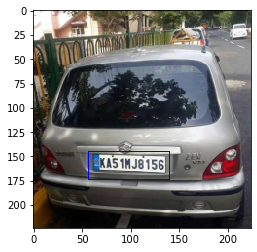

In [13]:
show_img(5)

In [14]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_generator = datagen.flow_from_dataframe(
    reduced_df,
    directory="D:\MACHINE LEARNING WITH P\Indian Number Plates/",
    x_col="image_name",
    y_col=["top_x", "top_y", "bottom_x", "bottom_y"],
    target_size=(WIDTH, HEIGHT),
    batch_size=32, 
    class_mode="other",
    subset="training")

validation_generator = datagen.flow_from_dataframe(
    reduced_df,
    directory="D:\MACHINE LEARNING WITH P\Indian Number Plates/",
    x_col="image_name",
    y_col=["top_x", "top_y", "bottom_x", "bottom_y"],
    target_size=(WIDTH, HEIGHT),
    batch_size=32, 
    class_mode="other",
    subset="validation")

Found 209 validated image filenames.
Found 23 validated image filenames.


In [15]:
model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(HEIGHT, WIDTH, CHANNEL)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.layers[-6].trainable = False

model.summary()











_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3211392   
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 260       
Total params: 17,938,756
Trainable params: 3,224,068
Non-trainable params: 14,714,688
______________________________________________

In [16]:
STEP_SIZE_TRAIN = int(np.ceil(train_generator.n / train_generator.batch_size))
STEP_SIZE_VAL = int(np.ceil(validation_generator.n / validation_generator.batch_size))

print("Train step size:", STEP_SIZE_TRAIN)
print("Validation step size:", STEP_SIZE_VAL)

train_generator.reset()
validation_generator.reset()

Train step size: 7
Validation step size: 1


In [18]:
adam = Adam(lr=0.0005)
model.compile(optimizer=adam, loss="mse")

In [19]:
history = model.fit_generator(train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=validation_generator,
    validation_steps=STEP_SIZE_VAL,
    epochs=30)



Epoch 1/30
7/7 [==============================] - 98s 14s/step - loss: 0.0376 - val_loss: 0.0257
Epoch 2/30
7/7 [==============================] - 95s 14s/step - loss: 0.0139 - val_loss: 0.0182
Epoch 3/30
7/7 [==============================] - 94s 13s/step - loss: 0.0072 - val_loss: 0.0153
Epoch 4/30
7/7 [==============================] - 94s 13s/step - loss: 0.0044 - val_loss: 0.0154
Epoch 5/30
7/7 [==============================] - 92s 13s/step - loss: 0.0027 - val_loss: 0.0144
Epoch 6/30
7/7 [==============================] - 93s 13s/step - loss: 0.0020 - val_loss: 0.0135
Epoch 7/30
7/7 [==============================] - 90s 13s/step - loss: 0.0018 - val_loss: 0.0134
Epoch 8/30
7/7 [==============================] - 96s 14s/step - loss: 0.0011 - val_loss: 0.0139
Epoch 9/30
7/7 [==============================] - 92s 13s/step - loss: 0.0011 - val_loss: 0.0122
Epoch 10/30
7/7 [==============================] - 94s 13s/step - loss: 6.5273e-04 - val_loss: 0.0122
Epoch 11/30
7/7 [======

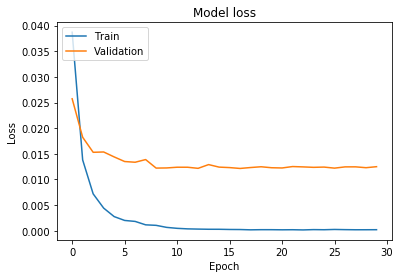

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [21]:
model.evaluate_generator(validation_generator, steps=STEP_SIZE_VAL)

0.012493113055825233

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


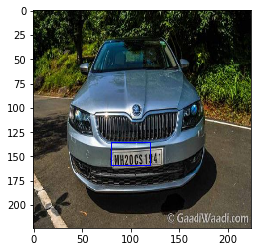

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


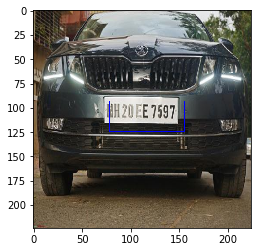

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


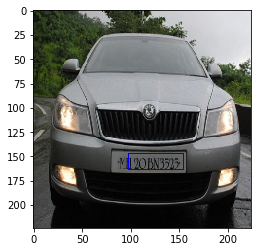

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


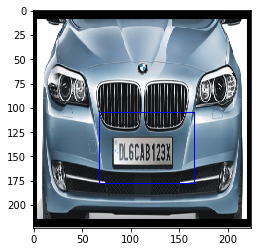

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


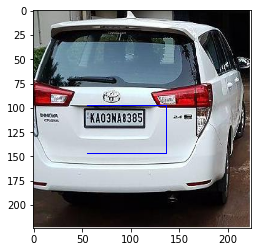

In [22]:
for idx, row in df.iloc[lucky_test_samples].iterrows():    
    img = cv2.resize(cv2.imread("D:\MACHINE LEARNING WITH P\Indian Number Plates/" + row[0]) / 255.0, dsize=(WIDTH, HEIGHT))
    y_hat = model.predict(img.reshape(1, WIDTH, HEIGHT, 3)).reshape(-1) * WIDTH
    
    xt, yt = y_hat[0], y_hat[1]
    xb, yb = y_hat[2], y_hat[3]
    
    img = cv2.cvtColor(img.astype(np.float32), cv2.COLOR_BGR2RGB)
    image = cv2.rectangle(img, (xt, yt), (xb, yb), (0, 0, 255), 1)
    plt.imshow(image)
    plt.show()